
In this project, I will follow The CRISP-DM Process for Stack Overflow Data survey- 2019

The CRISP-DM (Cross Industry Process for Data Mining) process steps:
Business Understanding

1. Business Understanding
Q1: what is the proportion of individuals in each OpenSourcer group?
Q2: Number of participant that use coding as their hobby?
Q3: what is the Top 10 Countries that participated in the 2019_survey and what is their trend?
Q4: what is the job satisfication ranking between developer?

Data Understanding

In [48]:
pwd


'C:\\Users\\18588\\Udacity\\stack_overflow_analysis'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [50]:
df_survey = pd.read_csv('survey_results_public.csv')
#show all columns' name to explore values 
pd.set_option('display.max_columns',85)
df_survey.head(2)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult


(88883, 85)

In [56]:
# Check the proption of NaN's in the each column
pd.isnull(df_survey).sum()/len(df_survey)*100

Respondent                 0.000000
MainBranch                 0.621041
Hobbyist                   0.000000
OpenSourcer                0.000000
OpenSource                 2.296277
Employment                 1.914877
Country                    0.148510
Student                    2.102764
EdLevel                    2.804811
UndergradMajor            14.928614
EduOther                   5.201220
OrgSize                   19.229774
DevType                    8.492063
YearsCode                  1.063195
Age1stCode                 1.405218
YearsCodePro              16.372085
CareerSat                 18.041695
JobSat                    20.133209
MgrIdiot                  31.191566
MgrMoney                  31.193817
MgrWant                   31.109436
JobSeek                    9.369621
LastHireDate              10.158298
LastInt                   24.445620
FizzBuzz                  19.732682
JobFactors                10.701709
ResumeUpdate              12.382570
CurrencySymbol            19

In [58]:
df_survey.select_dtypes('object').columns

Index(['MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource', 'Employment',
       'Country', 'Student', 'EdLevel', 'UndergradMajor', 'EduOther',
       'OrgSize', 'DevType', 'YearsCode', 'Age1stCode', 'YearsCodePro',
       'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek',
       'LastHireDate', 'LastInt', 'FizzBuzz', 'JobFactors', 'ResumeUpdate',
       'CurrencySymbol', 'CurrencyDesc', 'CompFreq', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'UnitTests', 'PurchaseHow', 'PurchaseWhat', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife', 'ITperson', 'OffOn',
       'SocialMedia', 'Extraversion', 'ScreenName', 'SOVi

In [59]:
#the number of respondent  is unique and listed once
len(df_survey.Respondent.unique())

88883

In [61]:
# Check each of the columns for NaN's and show  one's with highest Nan
data = pd.isnull(df_survey).sum()/len(df_survey)*100
data.sort_values(ascending=False).head(20)

BlockchainOrg             45.799534
CodeRevHrs                43.982539
ConvertedComp             37.194964
CompTotal                 37.057705
MiscTechWorkedWith        32.961309
BlockchainIs              32.309891
PurchaseHow               31.248945
MgrMoney                  31.193817
MgrIdiot                  31.191566
MgrWant                   31.109436
PurchaseWhat              30.212752
UnitTests                 29.493829
WebFrameDesireNextYear    29.183308
CompFreq                  28.818784
WorkWeekHrs               27.429317
MiscTechDesireNextYear    27.420317
WebFrameWorkedWith        26.845404
LastInt                   24.445620
WorkChallenge             23.336296
SOHowMuchTime             23.069653
dtype: float64

In [62]:
# Removes and prints columns with more than 90% of data missing
data_dpcol = df_survey.dropna(axis=1, thresh=len(data)*0.1)
dropped_col = set(df_survey.columns).difference(list(data_dpcol.columns))
print(f'Columns dropped: {dropped_col}')

Columns dropped: set()


In [63]:
# Removes rows with all missing values (Othes may be useful)
data_fil = data_dpcol.dropna(axis=0, thresh=1)
print(f'Number of rows dropped: {len(data_dpcol)-len(data_fil)}')

Number of rows dropped: 0


Hence there in no row with missing value in df_survey

In [64]:
# Find the columns that have no missing values
df_survey .columns[df_survey .isnull().sum() == 0]

Index(['Respondent', 'Hobbyist', 'OpenSourcer'], dtype='object')

In [65]:
# Delete cloumns that have more than 50% missing values
drop_col_ =df_survey.columns[df_survey.isnull().sum() > df_survey.shape[0] * 0.5]
drop_col_

Index([], dtype='object')

In [60]:
df_survey.shape

(88883, 85)

In [52]:
df_survey.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [53]:
# Print statistical summary of dataframe
df_survey.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,88883.000000,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,44442.000000,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,25658.456325,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22221.500000,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,44442.000000,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,66662.500000,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


Data preparetion

In [55]:
# Columns name with NO missing values.

v_data=df_survey.columns[df_survey.isnull().mean()==0]
v_data

Index(['Respondent', 'Hobbyist', 'OpenSourcer'], dtype='object')

In [46]:
#tally up number of ppl who participate in each openSourcer groups
df_survey['OpenSourcer'].value_counts()

Never                                                 32295
Less than once per year                               24972
Less than once a month but more than once per year    20561
Once a month or more often                            11055
Name: OpenSourcer, dtype: int64

In [8]:
#get insight on the name and type of columns
df_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              88883 non-null  int64  
 1   MainBranch              88331 non-null  object 
 2   Hobbyist                88883 non-null  object 
 3   OpenSourcer             88883 non-null  object 
 4   OpenSource              86842 non-null  object 
 5   Employment              87181 non-null  object 
 6   Country                 88751 non-null  object 
 7   Student                 87014 non-null  object 
 8   EdLevel                 86390 non-null  object 
 9   UndergradMajor          75614 non-null  object 
 10  EduOther                84260 non-null  object 
 11  OrgSize                 71791 non-null  object 
 12  DevType                 81335 non-null  object 
 13  YearsCode               87938 non-null  object 
 14  Age1stCode              87634 non-null

In [9]:
#what are the varity of programming language
language=set(';'.join(list(df_survey['LanguageWorkedWith'].dropna())).split(';'))
language
#list(df_survey['LanguageWorkedWith'].dropna()).split(';')

{'Assembly',
 'Bash/Shell/PowerShell',
 'C',
 'C#',
 'C++',
 'Clojure',
 'Dart',
 'Elixir',
 'Erlang',
 'F#',
 'Go',
 'HTML/CSS',
 'Java',
 'JavaScript',
 'Kotlin',
 'Objective-C',
 'Other(s):',
 'PHP',
 'Python',
 'R',
 'Ruby',
 'Rust',
 'SQL',
 'Scala',
 'Swift',
 'TypeScript',
 'VBA',
 'WebAssembly'}

In [47]:
#get an insight on the dataset.
pd_schma = pd.read_csv('survey_results_schema.csv',index_col='Column')
pd_schma.shape

#show all rows to get an idea what was the corresponding questions in 1th df
pd.set_option('display.max_rows',85)
pd_schma

,QuestionText
Column,
Respondent,Randomized respondent ID number (not in order ...
MainBranch,Which of the following options best describes ...
Hobbyist,Do you code as a hobby?
OpenSourcer,How often do you contribute to open source?
OpenSource,How do you feel about the quality of open sour...
Employment,Which of the following best describes your cur...
Country,In which country do you currently reside?
Student,"Are you currently enrolled in a formal, degree..."
EdLevel,Which of the following best describes the high...


what is the percentage of people from each country knowing SQL vs ppl does not knows SQL?

In [11]:
countries_df=df_survey .groupby(['Country'])
countries_df

In [12]:
#countries_df['LanguageWorkedWith'].apply(x=x.str.contains('SQL').value_counts(normalize=True))
df_python = countries_df['LanguageWorkedWith'].apply(lambda x: x.str.contains('SQL', na=False).value_counts(normalize=True))
df_python.rename({False:'Don\'t know', True:'I know'}, inplace=True)
df_python

Country                
Afghanistan  Don't know    0.545455
             I know        0.454545
Albania      I know        0.616279
             Don't know    0.383721
Algeria      I know        0.582090
                             ...   
Yemen        Don't know    0.315789
Zambia       I know        0.750000
             Don't know    0.250000
Zimbabwe     I know        0.538462
             Don't know    0.461538
Name: LanguageWorkedWith, Length: 341, dtype: float64

In [13]:
#what is the trend of using social media sites in US
filt=df_survey ['Country']=='United States'
df_survey .loc[filt]['SocialMedia'].value_counts()

Reddit                      5700
Twitter                     3468
Facebook                    2844
YouTube                     2463
I don't use social media    1851
Instagram                   1652
LinkedIn                    1020
WhatsApp                     609
Snapchat                     326
WeChat 微信                     93
VK ВКонта́кте                  9
Weibo 新浪微博                     8
Hello                          2
Youku Tudou 优酷                 1
Name: SocialMedia, dtype: int64

In [14]:
# what is the percentage of each social media sites in the US
diff_country = df_survey .groupby(['Country'])
x=diff_country['SocialMedia'].value_counts(normalize=True).loc['United States']
x

SocialMedia
Reddit                      0.284346
Twitter                     0.173002
Facebook                    0.141874
YouTube                     0.122867
I don't use social media    0.092338
Instagram                   0.082410
LinkedIn                    0.050883
WhatsApp                    0.030380
Snapchat                    0.016263
WeChat 微信                   0.004639
VK ВКонта́кте               0.000449
Weibo 新浪微博                  0.000399
Hello                       0.000100
Youku Tudou 优酷              0.000050
Name: SocialMedia, dtype: float64

In [15]:
#what percentage on ppl in each countries knows SQL
#step1:Grab totall # of ppl responsed to survey for each country
C=df_survey ['Country'].value_counts()
C

United States                       20949
India                                9061
Germany                              5866
United Kingdom                       5737
Canada                               3395
                                    ...  
Saint Vincent and the Grenadines        1
Chad                                    1
Sao Tome and Principe                   1
Dominica                                1
Timor-Leste                             1
Name: Country, Length: 179, dtype: int64

In [16]:
#step2:how many ppl in each country knows SQL
country_uses_SQL= countries_df['LanguageWorkedWith'].apply(lambda x: x.str.contains('SQL').sum())
country_uses_SQL

Country
Afghanistan                              20
Albania                                  53
Algeria                                  78
Andorra                                   0
Angola                                    1
                                       ... 
Venezuela, Bolivarian Republic of...     49
Viet Nam                                100
Yemen                                    13
Zambia                                    9
Zimbabwe                                 21
Name: LanguageWorkedWith, Length: 179, dtype: int64

In [17]:
#step 3: tolly/SQL useres
C/country_uses_SQL

Afghanistan                             2.200000
Albania                                 1.622642
Algeria                                 1.717949
Andorra                                      inf
Angola                                  5.000000
                                          ...   
Venezuela, Bolivarian Republic of...    1.795918
Viet Nam                                2.310000
Yemen                                   1.461538
Zambia                                  1.333333
Zimbabwe                                1.857143
Length: 179, dtype: float64

Q1) what is the proportion of individuals in each OpenSourcer group

In [18]:
# number of participant in each OpenSourcer groups
Open_Sourcer = df_survey['OpenSourcer'].value_counts()
Open_Sourcer

Never                                                 32295
Less than once per year                               24972
Less than once a month but more than once per year    20561
Once a month or more often                            11055
Name: OpenSourcer, dtype: int64

Data Modeling

In [26]:
def drawPlot(df):
    Open_Sourcer = df['OpenSourcer'].value_counts()
    (Open_Sourcer/df.shape[0]).plot.bar()    
    plt.title("The Proportion of Open_Sourcer");
    plt.xlabel('Open_Sourcer')
    plt.ylabel('Proportion')
    plt.show()
    

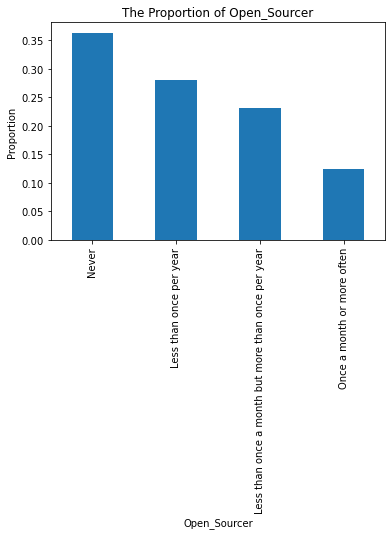

In [27]:


drawPlot(df_survey)

In [41]:
#define a function for plotting
    """
    Receive a dataframe df, title ,label for x axis and y axis
    Return and show a plot
    """
def drawPlot(x,df, title, xlabel,ylabel):
    
    (x/df.shape[0]).plot.bar()    
    plt.title(title);
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

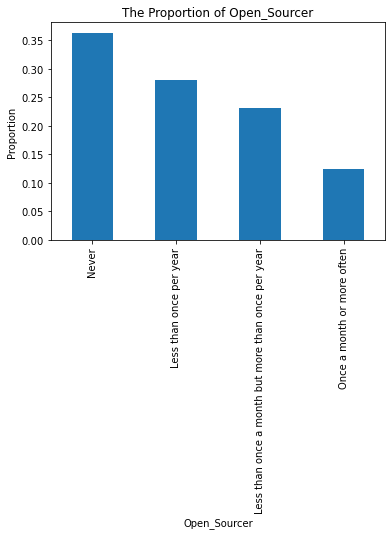

In [42]:
# Data Modeling for proportion of individuals in each OpenSourcer groups
#function call #1
x = df_survey['OpenSourcer'].value_counts()
title = "The Proportion of Open_Sourcer"
xlabel = "Open_Sourcer"
ylabel = "Proportion"
drawPlot(x, df_survey, title,xlabel,ylabel)

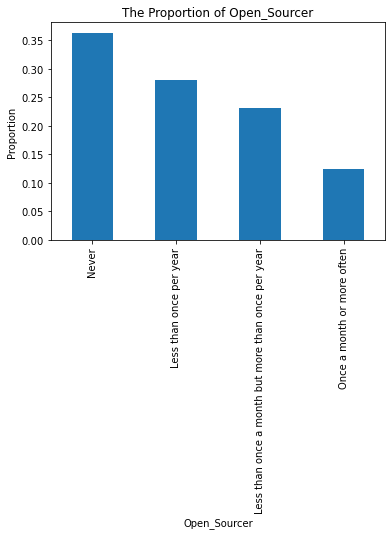

In [13]:
# Data Modeling for proportion of individuals in each OpenSourcer groups  
#(Open_Sourcer/df_survey.shape[0]).plot.bar()    
#plt.title("The Proportion of Open_Sourcer");
#plt.xlabel('Open_Sourcer')
#plt.ylabel('Proportion')
#plt.show()

Q2)Number of participant that use coding as their hobby

In [39]:
cod_hob = df_survey['Hobbyist'].value_counts()
cod_hob

Yes    71257
No     17626
Name: Hobbyist, dtype: int64

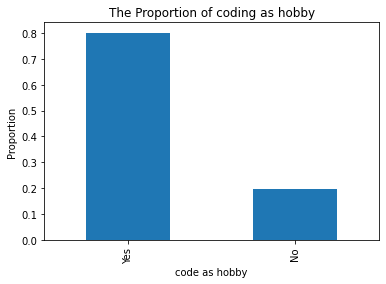

In [37]:
# Data Modeling for comparisin the # of individuals who code as hobby
#(cod_hob/df_survey.shape[0]).plot.bar()    
#plt.title("The Proportion of coding as hobby");
#plt.xlabel('code as hobby')
#plt.ylabel('Proportion')
#plt.show()

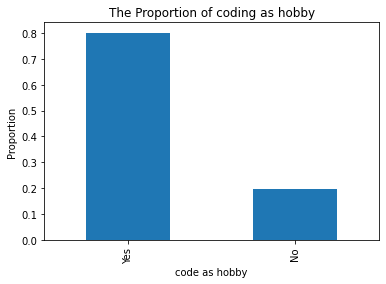

In [43]:
#function call #2
# Data Modeling for comparisin the # of individuals who code as hobby
cod_hob = df_survey['Hobbyist'].value_counts()
title = "The Proportion of coding as hobby"
xlabel = "code as hobby"
ylabel = "Proportion"
drawPlot(cod_hob, df_survey, title,xlabel,ylabel)

Q3.what is the Top 10 Countries that participated in the 2019_survey and what is their trend?

In [18]:
#which country is the most audiance for stack overflow
most_aud = df_survey['Country'].value_counts()
most_aud

United States                       20949
India                                9061
Germany                              5866
United Kingdom                       5737
Canada                               3395
                                    ...  
Dominica                                1
Niger                                   1
North Korea                             1
Sao Tome and Principe                   1
Saint Vincent and the Grenadines        1
Name: Country, Length: 179, dtype: int64

In [19]:
# Top 10 Countries that participated in the survey and what is the trend?
country = df_survey['Country'].value_counts().nlargest(10)
country

United States     20949
India              9061
Germany            5866
United Kingdom     5737
Canada             3395
France             2391
Brazil             1948
Poland             1922
Australia          1903
Netherlands        1852
Name: Country, dtype: int64

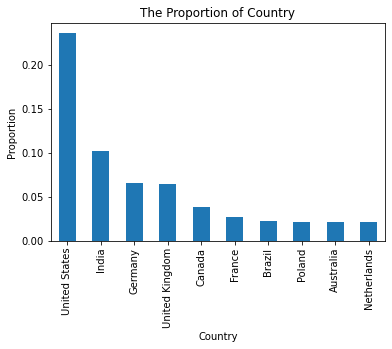

In [20]:
# waht is the 10 most respondants by country
#(country/df_survey.shape[0]).plot.bar()    
#plt.title("The Proportion of Country");
#plt.xlabel('Country')
#plt.ylabel('Proportion')
#plt.show()

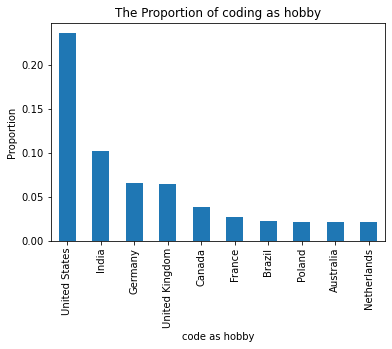

In [44]:
#function call #3
# waht is the 10 most respondants by country
country = df_survey['Country'].value_counts().nlargest(10)
title = "The Proportion of coding as hobby"
xlabel = "code as hobby"
ylabel = "Proportion"
drawPlot(country, df_survey, title,xlabel,ylabel)

Q4) what is the job satisfication ranking between developer?

In [21]:
filt1 = ~ (df_survey['CareerSat'].isna())
job_sat = df_survey[filt1]
job_sat.head(2)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,THB,Thai baht,23000.0,Monthly,8820.0,40.0,There's no schedule or spec; I work on what se...,Distracting work environment;Inadequate access...,Less than once per month / Never,Home,Average,No,NaN,"No, but I think we should",Not sure,I have little or no influence,HTML/CSS,Elixir;HTML/CSS,PostgreSQL,PostgreSQL,NaN,NaN,NaN,Other(s):,NaN,NaN,Vim;Visual Studio Code,Linux-based,I do not use containers,NaN,NaN,Yes,Yes,Yes,Reddit,In real life (in person),Username,2011,A few times per week,Find answers to specific questions;Learn how t...,6-10 times per week,They were about the same,NaN,Yes,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,100 to 499 employees,"Developer, full-stack",3,16,Less than 1 year,Very satisfied,Slightly satisfied,Very confident,No,Not sure,I am not interested in new job opportunities,Less than a year ago,"Write code by hand (e.g., on a whiteboard);Int...",No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,USD,United States dollar,61000.0,Yearly,61000.0,80.0,There's no schedule or spec; I work on what se...,NaN,Less than once per month / Never,Home,A little below average,No,NaN,"No, but I think we should",Developers typically have the most influence o...,I have little or no influence,C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,MySQL;SQLite,MySQL;SQLite,Linux;Windows,Linux;Windows,NaN,NaN,.NET,.NET,Eclipse;Vim;Visual Studio;Visual Studio Code,Windows,I do not use containers,Not at all,"Useful for decentralized currency (i.e., Bitcoin)",Yes,SIGH,Yes,Reddit,In real life (in person),Username,2014,Daily or almost daily,Find answers to specific questions;Pass the ti...,1-2 times per week,Stack Overflow was much faster,31-60 minutes,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,Tech articles written by other developers;Ind

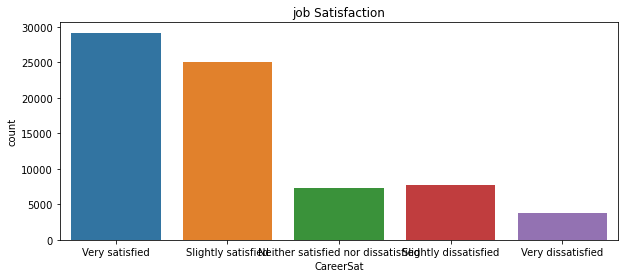

In [38]:
#data model
fig, ax = plt.subplots(1,1,figsize =(10,4))

ax.title.set_text('job Satisfaction')
sns.countplot(job_sat['CareerSat'] ,order=['Very satisfied', 
                                                  'Slightly satisfied', 
                                                  'Neither satisfied nor dissatisfied',
                                                  'Slightly dissatisfied',
                                                  'Very dissatisfied'], ax = ax)

In [22]:
#filter the result out for only the list of top 5 country:
#getting a sub_df based on condition(filter) 
countries = ['United States','India','Germany','United Kingdom','Canada']
filt= df_survey ['Country'].isin(countries)
df_survey.loc[filt]

#showing the country colmn from sub_df
#df.loc[filt,'Country']

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,100 to 499 employees,"Developer, full-stack",3,16,Less than 1 year,Very satisfied,Slightly satisfied,Very confident,No,Not sure,I am not interested in new job opportunities,Less than a year ago,"Write code by hand (e.g., on a whiteboard);Int...",No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,USD,United States dollar,61000.0,Yearly,61000.0,80.0,There's no schedule or spec; I work on what se...,NaN,Less than once per month / Never,Home,A little below average,No,NaN,"No, but I think we should",Developers typically have the most influence o...,I have little or no influence,C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,MySQL;SQLite,MySQL;SQLite,Linux;Windows,Linux;Windows,NaN,NaN,.NET,.NET,Eclipse;Vim;Visual Studio;Visual Studio Code,Windows,I do not use containers,Not at all,"Useful for decentralized currency (i.e., Bitcoin)",Yes,SIGH,Yes,Reddit,In real life (in person),Username,2014,Daily or almost daily,Find answers to specific questions;Pass the ti...,1-2 times per week,Stack Overflow was much faster,31-60 minutes,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
5,6,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Canada,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,Taken an online course in programming or softw...,NaN,

Q4)ppl whose python as programming language. since the value in related column is combination,
so one way is to use string method:

In [23]:
df_survey ['LanguageWorkedWith']


0                          HTML/CSS;Java;JavaScript;Python
1                                      C++;HTML/CSS;Python
2                                                 HTML/CSS
3                                      C;C++;C#;Python;SQL
4              C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA
                               ...                        
88878                        HTML/CSS;JavaScript;Other(s):
88879                                                  NaN
88880                                                  NaN
88881                                                  NaN
88882    Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...
Name: LanguageWorkedWith, Length: 88883, dtype: object

In [17]:
#we can see the value in this column is combination (using string method). also we have to take cate of the NaN values.
#(na=false means nothing do with those NaN values)
#find ppl(respondent) who use python
filt1 = df_survey ['LanguageWorkedWith'].str.contains('Python',na = False)
df_survey .loc[filt1,'LanguageWorkedWith']

0                          HTML/CSS;Java;JavaScript;Python
1                                      C++;HTML/CSS;Python
3                                      C;C++;C#;Python;SQL
4              C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA
7        Bash/Shell/PowerShell;C;C++;HTML/CSS;Java;Java...
                               ...                        
88854    Bash/Shell/PowerShell;C;C++;HTML/CSS;Java;Java...
88860      Bash/Shell/PowerShell;C++;Python;Ruby;Other(s):
88865      Bash/Shell/PowerShell;HTML/CSS;Python;Other(s):
88872             C;C++;HTML/CSS;JavaScript;PHP;Python;SQL
88876                           HTML/CSS;JavaScript;Python
Name: LanguageWorkedWith, Length: 36443, dtype: object

In [18]:
tp_slry=df_survey .nlargest(10, 'ConvertedComp')
tp_slry.head(2)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
57,58,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of LOWER quality than prop...",Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Received on-the-job training in software devel...,NaN,"Developer, back-end;Developer, desktop or ente...",28,19,23,Very satisfied,Very satisfied,Very confident,Yes,No,I am not interested in new job opportunities,1-2 years ago,NaN,Yes,Office environment or company culture;Remote w...,Re-entry into the workforce,USD,United States dollar,113000.0,Weekly,2000000.0,40.0,There's no schedule or spec; I work on what se...,Being tasked with non-development work;Non-wor...,"Less than half the time, but at least one day ...",Home,A little above average,"Yes, because I see value in code review",1.0,"No, but I think we should",Developers and management have nearly equal in...,I have a great deal of influence,C#;Java;SQL,C#;F#;Java;Kotlin;SQL,Microsoft SQL Server;Oracle;SQLite,Microsoft SQL Server;Oracle;SQLite,Android;Windows,Android;Raspberry Pi;Windows,ASP.NET;jQuery,Angular/Angular.js;ASP.NET;jQuery,.NET,Hadoop;.NET;.NET Core;Node.js;Puppet;Xamarin,Android Studio;Visual Studio,Windows,I do not use containers,NaN,NaN,Yes,Yes,Yes,I don't use social media,In real life (in person),Login,I don't remember,Multiple times per day,Find answers to specific questions,More than 10 times per week,Stack Overflow was much faster,NaN,Yes,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,NaN,47.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,NaN,Easy
101,102,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...","Taught yourself a new language, framework, or ...","5,000 to 9,999 employees","Developer, full-stack",8,29,5,Slightly satisfied,Slightly satisfied,Somewhat confident,No,No,"I’m not actively looking, but I am open to new...",1-2 years ago,"Write any code;Write code by hand (e.g., on a ...",Yes,Office environment or company culture;Opportun...,"Something else changed (education, award, medi...",USD,United States dollar,67800.0,Weekly,2000000.0,40.0,There is a schedule and/or spec (made by me or...,Being tasked with non-development work;Distrac...,Less than once per month / Never,Office,Average,No,NaN,"No, but I think we should",Not sure,I have some influence,C#;HTML/CSS;JavaScript;SQL;TypeScript,C;C++;Elixir;Go;Ruby;WebAssembly,Microsoft SQL Server,MongoDB;PostgreSQL;SQLite,Microsoft Azure,AWS;Kubernetes;Microsoft Azure,ASP.NET;jQuery;React.js;Other(s):,Angular/Angular.js;Vue.js,.NET;.NET Core,Node.js,Notepad++;Visual Studio;Visual Studio Code,Windows,I do not use containers,Non-currency applications of blockchain,Useful 

In [21]:
# what is the percentage of each social media sites in the US
diff_country = df_survey .groupby(['Country'])
x=diff_country['SocialMedia'].value_counts(normalize=True).loc['United States']
x

SocialMedia
Reddit                      0.284346
Twitter                     0.173002
Facebook                    0.141874
YouTube                     0.122867
I don't use social media    0.092338
Instagram                   0.082410
LinkedIn                    0.050883
WhatsApp                    0.030380
Snapchat                    0.016263
WeChat 微信                   0.004639
VK ВКонта́кте               0.000449
Weibo 新浪微博                  0.000399
Hello                       0.000100
Youku Tudou 优酷              0.000050
Name: SocialMedia, dtype: float64